<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code_11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODE 11.1 FITTING CW-IRSL SIGNALS FROM QUANTUM TUNNELING TRANSITIONS (THE KP-CW equation)

the KP-CW equatioN is used for analysis of CW-IRSL signals from quantum tunneling transitions (for example, feldpspars) ($c>0$):

\begin{equation}
I_{\textrm{}}(t)=\frac{A\,F(t)^{2}\,e^{-\rho'(F(t))^{3}}}{1+s'\,t}\
\end{equation}

\begin{equation}
F_{\textrm{}}(t)=\ln\biggl(1+s'\,t\biggr)\
\end{equation}

The fitting parameters here are the effective rate constant
$s'$ (in s$^{-1}$) for the CW-IRSL process, the scaling constant
$A$, and the dimensionless acceptor density $\rho'$. 

Code 11.1 fits a CW-IRSL experimental curve from sample
J1000, a granitic gneiss feldspar studied in detail by Pagonis et
al. (Pagonis2021c). 

The least squares fitting result is shown below the code, and the best fitting
values in this example are $A=2.00\pm0.08$, $\rho'=0.0115\pm0.0003$
and $s'=12.1\pm0.3$ s$^{-1}$. 

The following practical detail is
of importance: the analytical KP-CW equation (\ref{eq:KP-CW ch11})
gives a non-physical mathematical answer of zero for the intensity
at time $t=0$, i.e. $I_{\textrm{}}(0)=0$ . For this reason, it is
necessary that the file which contains the experimental data starts
at some value $t$>0 (e.g. at time $t=1$ s), and not
at time $t=0.$ This is a necessary condition for the fitting process
to work correctly.




FOM= 3.64  %
+---+------+---------+--------+----------+------+-------+
| A |  dA  |   rho   | d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+--------+----------+------+-------+
| 2 | 0.08 | 0.01157 | 0.0003 |  12.07   | 0.33 | 0.033 |
+---+------+---------+--------+----------+------+-------+


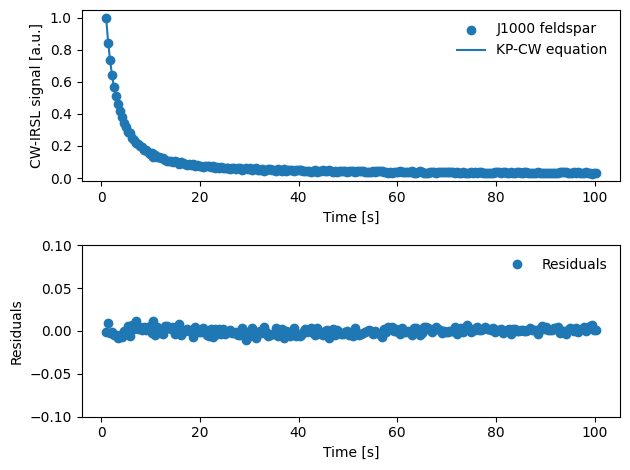

In [3]:
# J1000 CW-IRSL data fitted with KP-CW equation
from scipy import optimize
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings("ignore")
import requests
from scipy.special import wrightomega

# read data file from GitHub
url='https://github.com/vpagonis/EURADOS-2023/raw/main/J1000cwirsl.txt'
response=requests.get(url)
a=response.text
b=np.array(list(map(float,a.strip("[]").split())))
data=b.reshape(-1,2)

x_data,y_data=data[:,0][1:800], data[:,1][1:800]

# normalize the data
y_data=y_data/max(y_data)
plt.subplot(2,1, 1)

# function for KP-CW equation
def test_func(x, imax_fit,rho_fit, A_fit,bgd_fit):
    return imax_fit*np.exp (-rho_fit*(np.log(1 + A_fit*x))\
	** 3.0)*(np.log(1+A_fit*x)**2.0)/(1+x*A_fit)+bgd_fit

# find best fit parameters to the data and errors
params, cov = optimize.curve_fit(test_func,\
x_data, y_data)
drho= round(np.sqrt(cov[1][1]),5)
dA = round(np.sqrt(cov[2][2]),2)
dimax = round(np.sqrt(cov[0][2]),2)

# plot data and best fit
plt.scatter(x_data, y_data, label='J1000 feldspar')
plt.plot(x_data, test_func(x_data, *params[0:4]),
label='KP-CW equation')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.ylabel('CW-IRSL signal [a.u.]')
plt.xlabel('Time [s]')

# plot residuals
plt.subplot(2,1, 2)
plt.plot(x_data,test_func(x_data, *params[0:4])-\
y_data,"o",label='Residuals')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.ylabel('Residuals')
plt.xlabel('Time [s]')
plt.ylim(-.1,.1)
plt.tight_layout()

# print table of best fit parameters
imax,rho, A, bgd=int(params[0]),round(params[1],5),\
round(params[2],2),round(params[-1],3)
res=test_func(x_data, *params)-y_data
FOM=round(100*np.sum(abs(res))/np.sum(y_data),2)
myTable=PrettyTable(["A",'dA', "rho",  "d(rho)",\
"s'(s^-1)","ds'",'bgd'])  
myTable.add_row([imax,dimax,rho,drho, A, dA,bgd])
print('FOM=',FOM,' %')
print(myTable)
plt.show()

# [Return to EURADOS website](https://blog.mcdaniel.edu/vasilispagonis/python-codes-for-eurados-2023/)